# Calculating the Radius from transit depth

You Belong With Me
****

Importing Modules

In [1]:
import astropy.constants as const
import Gridingtons as grid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from WhatisLife import Rotator

In [2]:
%matplotlib notebook
π = np.pi
Colour = plt.style.use('tableau-colorblind10')

In [3]:
def ScreamExtractor(File, Sep=','):
    FILENAME = pd.read_csv(f'{File}', sep=Sep, comment='#')
    return FILENAME

In [66]:
Directory = 'C:/Users/georg/Documents/GitHub/Iwan-and-George-Year-4-Project/Exoplanets'
HoVanData = ScreamExtractor(f'{Directory}/Sorted Data/Planets/HoVan All Planets.csv')
GaiaDatat = ScreamExtractor(f'{Directory}/BASTA/Input/Gaia.txt', '\t')
GaiaData2t = ScreamExtractor(f'{Directory}/Sorted Data/Stars/Gaia All Stars.csv')
BASTAData = ScreamExtractor(f'{Directory}/BASTA/Output/GaiaResultsFinal.txt', '\t')
#BASTAData = ScreamExtractor(f'{Directory}/BASTA/Output/GaiaBaSTI/GaiaBaSTIResults.ascii', ' ')
ExoData = ScreamExtractor(f'{Directory}/Sorted Data/Planets/Exo All Planets.csv')

In [67]:
Object = HoVanData
for f in range(len(Object)):
    if str(Object['Host Gaia DR3 ID'][f]) == 'nan':
        HoVanData = HoVanData.drop(f)
Object = BASTAData
for f in range(len(Object)):
    if str(Object['radPhot'][f]) == 'nan':
        BASTAData = BASTAData.drop(f)

In [68]:
GaiaData = pd.DataFrame()
GaiaData2 = pd.DataFrame()
for g in range(len(BASTAData)):
    try:
        Line = GaiaDatat[GaiaDatat['ID'] == BASTAData['starid'][g]]
        GaiaData = pd.concat([GaiaData, Line], ignore_index=True)
    except:
        continue

    try:
        Line = GaiaData2t[GaiaData2t['Gaia DR3 ID'] == BASTAData['starid'][g]]
        GaiaData2 = pd.concat([GaiaData2, Line], ignore_index=True)
    except:
        continue

In [55]:
PeriodGaia = []
PlanetRadiusGaia = []
PeriodBASTA = []
PlanetRadiusBASTA = []
for n in range(len(HoVanData)):
    try:
        Index = GaiaData.loc[GaiaData['Gaia DR3 ID'] == PlanetID[n]].index[0]
        Radius = Ratio[n]*GaiaData['Radius'][Index]*const.R_sun/const.R_earth
        if Radius < 5:
            OrbitalPeriodList.append(OrbitalPeriod[n])
            PlanetRadius.append(Radius)
        
        IndexBASTA = BASTAData.loc[BASTAData['Gaia DR3 ID'] == PlanetID[n]].index[0]
        Radius = Ratio[n]*BASTAData['Radius'][Index]*const.R_sun/const.R_earth
        if Radius < 5:
            OrbitalPeriodListBASTA.append(OrbitalPeriod[n])
            PlanetRadiusBASTA.append(Radius)
    except:
        continue

In [ ]:
def Gradienter(XAxis, YAxis, m, X=10):
    NewX = np.linspace(10, 10, len(XAxis))
    NewY = 10**(m*(X-XAxis)+YAxis)
    return NewX, NewY

In [ ]:
# m = -0.11+-0.02, c = 0.37+0.02-0.03

OP = np.log10(np.array(OrbitalPeriodList))
PR = np.log10(np.array(PlanetRadius))
OPBASTA = np.log10(np.array(OrbitalPeriodListBASTA))
PRBASTA = np.log10(np.array(PlanetRadiusBASTA))
Gradient = np.linspace(-0.096, -0.096, 1)

X, Y = Gradienter(OP, PR, Gradient[0])
XBASTA, YBASTA = Gradienter(OPBASTA, PRBASTA, Gradient[0])

x = np.linspace(min(OP), max(OP), 2)
y = -0.096*x + 0.37

Title = 'Radius Valley plot for Gaia Stars and Exo Planets'

plt.figure()
plt.plot(OP, 10**PR, '.', color=Colour, markersize=2, label='Gaia')
plt.plot(OPBASTA, 10**PRBASTA, '.', color=Colour, markersize=2, label='BASTA (Gaia)')
plt.plot(x, 10**y, color=Colour, label='Model (HoVan)')
plt.xlabel('log(Orbital Period/Days)', fontsize=12)
plt.ylabel('$R/R_{\oplus}$', fontsize=12)
plt.title(Title, fontsize=15)
plt.legend()
plt.show()
#plt.savefig(f'{Directory}/Plots/Plots I\'m definetly not using for my seminar/{Title}')

Title = 'Density plot of the Radius Valley for Gaia and BASTA (Gaia)'
plt.figure()
KDE = sns.kdeplot(10**Y, bw_adjust=0.25, label='Gaia')
KDEFulton = sns.kdeplot(10**YBASTA, bw_adjust=0.25, label='BASTA (Gaia)')
plt.xlabel('$R/R_{\oplus}$', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(1, 4)
plt.title(Title, fontsize=15)
plt.legend()
plt.show()
#plt.savefig(f'{Directory}/Plots/Plots I\'m definetly not using for my seminar/{Title}')

In [ ]:
x = np.linspace(min(OrbitalPeriodList), max(OrbitalPeriodList), 2)
m = -0.11
c1 = 0.37
y1 = 10**(m*np.log10(x) + c1)

In [ ]:
plt.figure()
plt.plot(OrbitalPeriodList, PlanetRadius, '.', markersize=2)
plt.plot(x, y1, label='Radius Valley (VanHo)')
plt.xlabel('Orbital Period (days)', fontsize=12)
plt.ylabel(r'$R_p/R_{\oplus}$', fontsize=12)
plt.title('Radius Valley for exoplanets from HoVan and stellar data from Gaia', fontsize=12)
plt.xscale('log')
plt.legend()
plt.show()

In [56]:
SolarTemp = 5772
def LuminosityErrors(Radius, Teff, RadiusError, TeffError):
    Error = 4*Radius**2*Teff**6/SolarTemp**8*(Teff**2*RadiusError**2 + 4*Radius**2*TeffError**2)
    return Error

In [69]:
LuminosityGaia = GaiaData2['Radius']**2*(GaiaData2['Teff']/SolarTemp)**4
LuminosityBASTA = BASTAData['radPhot']**2*(BASTAData['Teff']/SolarTemp)**4
LuminosityGaiaerrp = LuminosityErrors(GaiaData2['Radius'], GaiaData['Teff'], 
                                       GaiaData2['Rad pe'], GaiaData['Teff-err-new'])
LuminosityGaiaerrm = LuminosityErrors(GaiaData2['Radius'], GaiaData['Teff'], 
                                       GaiaData2['Rad me'], GaiaData['Teff-err-new'])
LuminosityBASTAerrp = LuminosityErrors(BASTAData['radPhot'], BASTAData['Teff'], 
                                       BASTAData['radPhot_errp'], BASTAData['Teff_errp'])
LuminosityBASTAerrm = LuminosityErrors(BASTAData['radPhot'], BASTAData['Teff'], 
                                       BASTAData['radPhot_errm'], BASTAData['Teff_errm'])

<IPython.core.display.Javascript object>


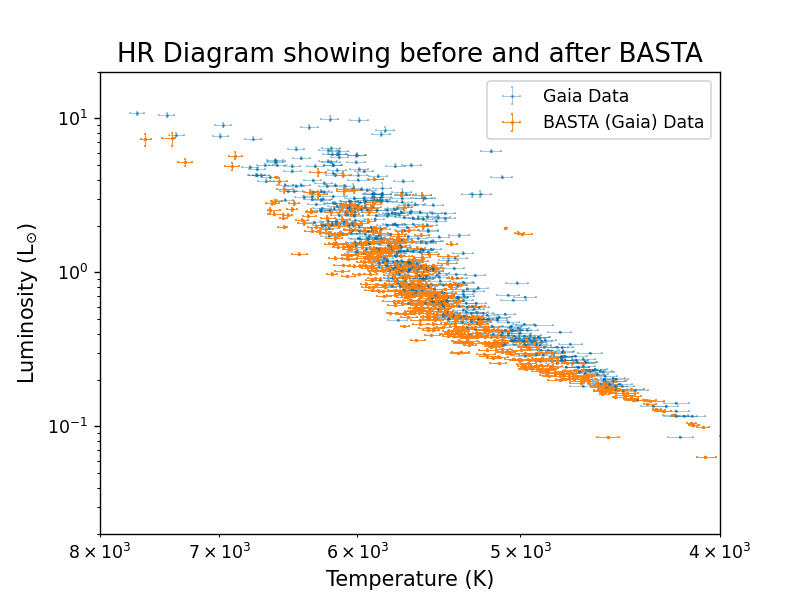

In [71]:
Title = 'HR Diagram showing before and after BASTA'

plt.figure()
plt.errorbar(GaiaData2['Teff'], LuminosityGaia, xerr=GaiaData['Teff-err-new'],
             yerr=[LuminosityGaiaerrp, LuminosityGaiaerrm], fmt='.', color=Colour,
             elinewidth=0.5, capsize=0.5, markersize=2, label='Gaia Data', alpha=0.4)
plt.errorbar(BASTAData['Teff'], LuminosityBASTA, xerr=[BASTAData['Teff_errp'], BASTAData['Teff_errm']],
             yerr=[LuminosityBASTAerrp, LuminosityBASTAerrm], fmt='.', color=Colour,
             elinewidth=0.5, capsize=0.5, markersize=2, label='BASTA (Gaia) Data', alpha=1)
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Luminosity (L$_{\odot}$)', fontsize=12)
plt.title(Title, fontsize=15)
plt.xlim(8000, 4000)
plt.ylim(0.02, 20)
plt.legend()
plt.show()
#plt.savefig(f'{Directory}/Plots/Money Plots/1 - {Title}')

In [ ]:
Offset = grid.Offset()
print(max(Offset))

Title = 'Parallax Offset (0, 15)'

plt.figure()
plt.plot(Offset, '.', markersize=2)
plt.ylabel('Parallax Offset', fontsize=12)
plt.title(Title, fontsize=15)
plt.ylim(0, 15)
plt.show()
#plt.savefig(f'{Directory}/Plots/Plots I\'m definetly not using for my seminar/{Title}')

You tatty git